# day 8 of #66daysofdata_NLP
## NLTK: part 7
## Named Entity Recognition with Stanford NER Tagger

* ref: 
    - [https://pythonprogramming.net](https://pythonprogramming.net)
    - [Stanford Named Entity Recognizer (NER)](https://nlp.stanford.edu/software/CRF-NER.shtml#Download)

A big benefit of the `Stanford NER tagger` is that is provides us with a few different models for pulling out named entities. We can use any of the following:

- __3__ class model for recognizing `locations`, `persons`, and `organizations`
- __4__ class model for recognizing `locations`, `persons`, `organizations`, and `miscellaneous entities`
- __7__ class model for recognizing `locations`, `persons`, `organizations`, `times`, `money`, `percents`, and `dates`


In [10]:
# -*- coding: utf-8 -*-

# we'll need to download the models and a jar file, since the NER classifier is written in Java.
# NTLK provides a wrapper to the Stanford tagger 
from nltk.tag import StanfordNERTagger
from nltk.tokenize import word_tokenize

st = StanfordNERTagger('StanfordNERTagger_data/english.all.3class.distsim.crf.ser.gz',
					   'StanfordNERTagger_data/stanford-ner.jar',
					   encoding='utf-8')

text = 'While in France, Christine Lagarde discussed short-term stimulus efforts in a recent interview with the Wall Street Journal.'

tokenized_text = word_tokenize(text)
classified_text = st.tag(tokenized_text)

print("'O' (means)--> other, i.e., non-named entities\n ",classified_text)

'O' (means)--> other, i.e., non-named entities
  [('While', 'O'), ('in', 'O'), ('France', 'LOCATION'), (',', 'O'), ('Christine', 'PERSON'), ('Lagarde', 'PERSON'), ('discussed', 'O'), ('short-term', 'O'), ('stimulus', 'O'), ('efforts', 'O'), ('in', 'O'), ('a', 'O'), ('recent', 'O'), ('interview', 'O'), ('with', 'O'), ('the', 'O'), ('Wall', 'ORGANIZATION'), ('Street', 'ORGANIZATION'), ('Journal', 'ORGANIZATION'), ('.', 'O')]


## Testing NLTK and Stanford NER Taggers for Accuracy

In [2]:
import nltk
from nltk.tag import StanfordNERTagger
from nltk.metrics.scores import accuracy

#  manually annotated dataset available for free with over 16,000 English sentences.
raw_annotations = open("../datasets/wikigold.conll.txt").read()
split_annotations = raw_annotations.split()

# Amend class annotations to reflect Stanford's NERTagger
for n,i in enumerate(split_annotations):
	if i == "I-PER":
		split_annotations[n] = "PERSON"
	if i == "I-ORG":
		split_annotations[n] = "ORGANIZATION"
	if i == "I-LOC":
		split_annotations[n] = "LOCATION"

# Group NE data into tuples
def group(lst, n):
    for i in range(0, len(lst), n):
        val = lst[i:i+n]
        if len(val) == n:
            yield tuple(val)

reference_annotations = list(group(split_annotations, 2))

In [8]:
pure_tokens = split_annotations[::2]


In [4]:
tagged_words = nltk.pos_tag(pure_tokens)
nltk_unformatted_prediction = nltk.ne_chunk(tagged_words)

In [5]:
#Convert prediction to multiline string and then to list (includes pos tags)
multiline_string = nltk.chunk.tree2conllstr(nltk_unformatted_prediction)
listed_pos_and_ne = multiline_string.split()

# Delete pos tags and rename
del listed_pos_and_ne[1::3]
listed_ne = listed_pos_and_ne

# Amend class annotations for consistency with reference_annotations
for n,i in enumerate(listed_ne):
	if i == "B-PERSON":
		listed_ne[n] = "PERSON"
	if i == "I-PERSON":
		listed_ne[n] = "PERSON"    
	if i == "B-ORGANIZATION":
		listed_ne[n] = "ORGANIZATION"
	if i == "I-ORGANIZATION":
		listed_ne[n] = "ORGANIZATION"
	if i == "B-LOCATION":
		listed_ne[n] = "LOCATION"
	if i == "I-LOCATION":
		listed_ne[n] = "LOCATION"
	if i == "B-GPE":
		listed_ne[n] = "LOCATION"
	if i == "I-GPE":
		listed_ne[n] = "LOCATION"

# Group prediction into tuples
nltk_formatted_prediction = list(group(listed_ne, 2))

In [6]:
nltk_accuracy = accuracy(reference_annotations, nltk_formatted_prediction)
print(nltk_accuracy)

0.8977574581119738


In [7]:
stanford_prediction = st.tag(pure_tokens)
stanford_accuracy = accuracy(reference_annotations, stanford_prediction)
print(stanford_accuracy)

0.9222261953412342


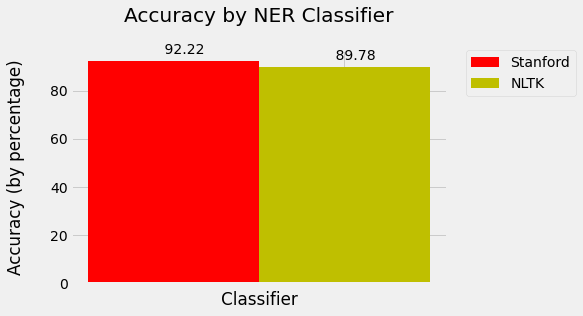

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style

style.use('fivethirtyeight')

N = 1
ind = np.arange(N)  # the x locations for the groups
width = 0.35       # the width of the bars

fig, ax = plt.subplots()

stanford_percentage = stanford_accuracy * 100
rects1 = ax.bar(ind, stanford_percentage, width, color='r')

nltk_percentage = nltk_accuracy * 100
rects2 = ax.bar(ind+width, nltk_percentage, width, color='y')

# add some text for labels, title and axes ticks
ax.set_xlabel('Classifier')
ax.set_ylabel('Accuracy (by percentage)\n')
ax.set_title('Accuracy by NER Classifier\n')
ax.set_xticks(ind+width)
ax.set_xticklabels( ('') )

ax.legend( (rects1[0], rects2[0]), ('Stanford', 'NLTK'), bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0. )

def autolabel(rects):
	# attach some text labels
	for rect in rects:
		height = rect.get_height()
		ax.text(rect.get_x()+rect.get_width()/2., 1.02*height, '%10.2f' % float(height),
				ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

plt.show()